In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df1 = pd.read_csv('winemag-data_first150k.csv')
df2 = pd.read_csv('winemag-data-130k-v2.csv')
data = pd.concat([df1, df2], ignore_index=True)
data.head(10)
print("Number of rows and columns: {}".format(data.shape))

Number of rows and columns: (280901, 14)


In [15]:
data.isnull().mean()

Unnamed: 0               0.000000
country                  0.000242
description              0.000000
designation              0.296190
points                   0.000000
price                    0.080779
province                 0.000242
region_1                 0.164852
region_2                 0.603191
taster_name              0.630735
taster_twitter_handle    0.648424
title                    0.537307
variety                  0.000004
winery                   0.000000
dtype: float64

In [16]:
data = data.drop(['taster_name', 'taster_twitter_handle', 'title', 'region_2', 'designation'], axis=1)
data.describe(include='all',)

,Unnamed: 0,country,description,points,price,province,region_1,variety,winery
count,280901.000000,280833,280901,280901.000000,258210.000000,280833,234594,280900,280901
unique,NaN,50,169430,NaN,NaN,490,1332,756,19186
top,NaN,US,A little bit funky and unsettled when you pop ...,NaN,NaN,California,Napa Valley,Pinot Noir,Williams Selyem
freq,NaN,116901,7,NaN,NaN,80755,10689,27563,585
mean,70615.705960,NaN,NaN,88.146934,34.177162,NaN,NaN,NaN,NaN
std,41214.379445,NaN,NaN,3.151528,38.611708,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN
25%,35112.000000,NaN,NaN,86.000000,16.000000,NaN,NaN,NaN,NaN
50%,70225.000000,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN
75%,105337.000000,NaN,NaN,90.000000,40.000000,NaN,NaN,NaN,NaN


In [17]:
data_deduped = data.drop(labels='Unnamed: 0', axis=1).drop_duplicates()

In [18]:
data_deduped.shape

(169776, 8)

In [19]:
data_deduped.head(10)

,country,description,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,95,60.0,California,Sonoma Coast,Pinot Noir,Blue Farm


Text(0.5,1,u'Top 10 countries producing the most distinct number of wines')

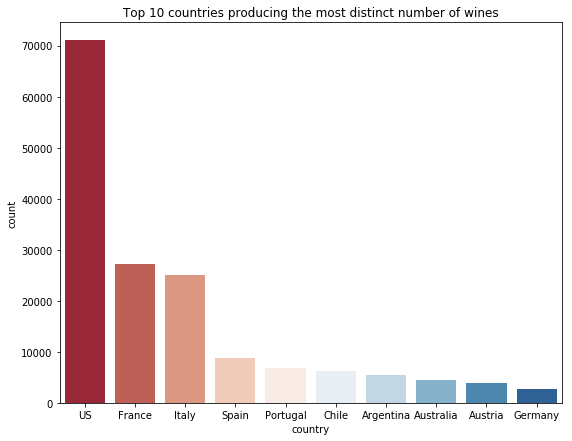

In [20]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='country', data=data_deduped, order=data_deduped['country'].value_counts().iloc[:10].index, palette='RdBu').set_title("Top 10 countries producing the most distinct number of wines")

Text(0.5,1,u'Kernel density estimate')

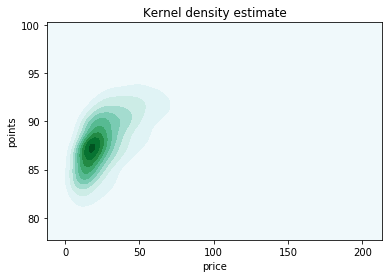

In [21]:
kde_data = data_deduped[data_deduped['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000)
sns.kdeplot(kde_data.price, kde_data.points, shade=True, legend=True).set_title("Kernel density estimate")

[Text(0,0,u'California'),
 Text(0,0,u'Northern Spain'),
 Text(0,0,u'Oregon'),
 Text(0,0,u'Northeastern Italy'),
 Text(0,0,u'Washington'),
 Text(0,0,u'Tuscany'),
 Text(0,0,u'Burgundy'),
 Text(0,0,u'New York'),
 Text(0,0,u'Mendoza Province'),
 Text(0,0,u'Piedmont'),
 Text(0,0,u'Veneto'),
 Text(0,0,u'Sicily & Sardinia'),
 Text(0,0,u'Bordeaux'),
 Text(0,0,u'Alsace'),
 Text(0,0,u'South Australia')]

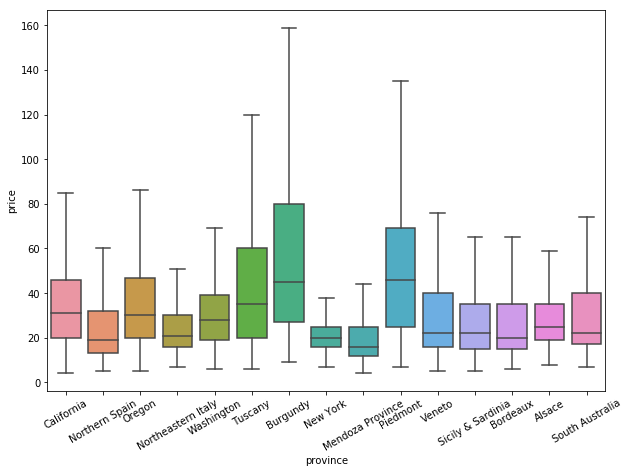

In [22]:
a4_dims = (10, 7)
fig, ax = plt.subplots(figsize=a4_dims)
top_15_provinces = data_deduped['province'].value_counts().iloc[:15].index

top_15_provinces_data = data_deduped[data_deduped['province'].isin(top_15_provinces)]
g = sns.boxplot(x='province', y='price', data=top_15_provinces_data, showfliers=False)
g.set_xticklabels(g.get_xticklabels(), rotation=30)